<a href="https://colab.research.google.com/github/Ryan-S-S/Monitoria/blob/main/T%C3%A9cnicas%20de%20Aprendizagem%20Diversas/Kmeans/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Dataset

In [26]:
# Dataset : https://www.kaggle.com/datasets/tigganeha4/diabetes-dataset-2019
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vT9LifxAPdLBON9jDFpTe-z9VJuTlR6-WgqKCuQiaTNbdXBWdqp7R618IXDlzaDwpyQJzzT7sbmWj7X/pub?gid=29767771&single=true&output=csv')
df

,Age,Gender,Family_Diabetes,highBP,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,JunkFood,Stress,BPLevel,Pregancies,Pdiabetes,UriationFreq,Diabetic
0,50-59,Male,no,yes,one hr or more,39.0,no,no,8,6,no,occasionally,sometimes,high,0.0,0,not much,no
1,50-59,Male,no,yes,less than half an hr,28.0,no,no,8,6,yes,very often,sometimes,normal,0.0,0,not much,no
2,40-49,Male,no,no,one hr or more,24.0,no,no,6,6,no,occasionally,sometimes,normal,0.0,0,not much,no
3,50-59,Male,no,no,one hr or more,23.0,no,no,8,6,no,occasionally,sometimes,normal,0.0,0,not much,no
4,40-49,Male,no,no,less than half an hr,27.0,no,no,8,8,no,occasionally,sometimes,normal,0.0,0,not much,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947,less than 40,Male,yes,no,more than half an hr,25.0,no,no,8,6,no,often,sometimes,normal,0.0,0,not much,yes
948,60 or older,Male,yes,yes,more than half an hr,27.0,no,no,6,5,yes,occasionally,sometimes,high,0.0,0,quite often,yes
949,60 or older,Male,no,yes,none,23.0,no,no,6,5,yes,occasionally,sometimes,high,0.0,0,not much,no
950,60 or older,Male,no,yes,less than half an hr,27.0,no,yes,6,5,yes,occasionally,very often,high,0.0,0,not much,no


In [27]:
# Limpeza e tratamento de dados

# Substituindo valores ausentes
df.loc[pd.isnull(df.BMI), 'BMI'] = df.BMI.mean()
df.loc[pd.isnull(df.Pregancies), 'Pregancies'] = 0
df.loc[pd.isnull(df.Pdiabetes), 'Pdiabetes'] = 0
df.loc[pd.isnull(df.Diabetic), 'Diabetic'] = 'no'

# Corrigindo erros nos dados
df.loc[:, 'Diabetic'] = df.Diabetic.replace(' no', 'no')
df.loc[:, 'Pdiabetes'] = df.Pdiabetes.replace(0, 'no')
df.loc[:, 'RegularMedicine'] = df.RegularMedicine.replace('o', 'no')
df.loc[:, 'BPLevel'] = df.BPLevel.replace('normal ', 'normal').replace('High', 'high').replace('Low', 'low')

In [28]:
df.columns

Index(['Age', 'Gender', 'Family_Diabetes', 'highBP', 'PhysicallyActive', 'BMI',
       'Smoking', 'Alcohol', 'Sleep', 'SoundSleep', 'RegularMedicine',
       'JunkFood', 'Stress', 'BPLevel', 'Pregancies', 'Pdiabetes',
       'UriationFreq', 'Diabetic'],
      dtype='object')

In [29]:
# Para cada coluna categórica, ele cria novas colunas binárias (dummy).
df_d = pd.get_dummies(df)

In [30]:
df_d

,BMI,Sleep,SoundSleep,Pregancies,Age_40-49,Age_50-59,Age_60 or older,Age_less than 40,Gender_Female,Gender_Male,...,BPLevel_high,BPLevel_low,BPLevel_normal,Pdiabetes_0,Pdiabetes_no,Pdiabetes_yes,UriationFreq_not much,UriationFreq_quite often,Diabetic_no,Diabetic_yes
0,39.0,8,6,0.0,False,True,False,False,False,True,...,True,False,False,True,False,False,True,False,True,False
1,28.0,8,6,0.0,False,True,False,False,False,True,...,False,False,True,True,False,False,True,False,True,False
2,24.0,6,6,0.0,True,False,False,False,False,True,...,False,False,True,True,False,False,True,False,True,False
3,23.0,8,6,0.0,False,True,False,False,False,True,...,False,False,True,True,False,False,True,False,True,False
4,27.0,8,8,0.0,True,False,False,False,False,True,...,False,False,True,True,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947,25.0,8,6,0.0,False,False,False,True,False,True,...,False,False,True,True,False,False,True,False,False,True
948,27.0,6,5,0.0,False,False,True,False,False,True,...,True,False,False,True,False,False,False,True,False,True
949,23.0,6,5,0.0,False,False,True,False,False,True,...,True,False,False,True,False,False,True,False,True,False
950,27.0,6,5,0.0,False,False,True,False,False,True,...,True,False,False,True,False,False,True,False,True,False


In [31]:
# Normalizando cada linha do DataFrame
X = df_d.div(df_d.sum(axis=1), axis=0)

In [32]:
X

,BMI,Sleep,SoundSleep,Pregancies,Age_40-49,Age_50-59,Age_60 or older,Age_less than 40,Gender_Female,Gender_Male,...,BPLevel_high,BPLevel_low,BPLevel_normal,Pdiabetes_0,Pdiabetes_no,Pdiabetes_yes,UriationFreq_not much,UriationFreq_quite often,Diabetic_no,Diabetic_yes
0,0.58209,0.119403,0.089552,0.0,0.0,0.014925,0.0,0.0,0.0,0.014925,...,0.014925,0.0,0.0,0.014925,0.0,0.0,0.014925,0.0,0.014925,0.0
1,0.5,0.142857,0.107143,0.0,0.0,0.017857,0.0,0.0,0.0,0.017857,...,0.0,0.0,0.017857,0.017857,0.0,0.0,0.017857,0.0,0.017857,0.0
2,0.48,0.12,0.12,0.0,0.02,0.0,0.0,0.0,0.0,0.02,...,0.0,0.0,0.02,0.02,0.0,0.0,0.02,0.0,0.02,0.0
3,0.45098,0.156863,0.117647,0.0,0.0,0.019608,0.0,0.0,0.0,0.019608,...,0.0,0.0,0.019608,0.019608,0.0,0.0,0.019608,0.0,0.019608,0.0
4,0.473684,0.140351,0.140351,0.0,0.017544,0.0,0.0,0.0,0.0,0.017544,...,0.0,0.0,0.017544,0.017544,0.0,0.0,0.017544,0.0,0.017544,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947,0.471698,0.150943,0.113208,0.0,0.0,0.0,0.0,0.018868,0.0,0.018868,...,0.0,0.0,0.018868,0.018868,0.0,0.0,0.018868,0.0,0.0,0.018868
948,0.519231,0.115385,0.096154,0.0,0.0,0.0,0.019231,0.0,0.0,0.019231,...,0.019231,0.0,0.0,0.019231,0.0,0.0,0.0,0.019231,0.0,0.019231
949,0.479167,0.125,0.104167,0.0,0.0,0.0,0.020833,0.0,0.0,0.020833,...,0.020833,0.0,0.0,0.020833,0.0,0.0,0.020833,0.0,0.020833,0.0
950,0.519231,0.115385,0.096154,0.0,0.0,0.0,0.019231,0.0,0.0,0.019231,...,0.019231,0.0,0.0,0.019231,0.0,0.0,0.019231,0.0,0.019231,0.0


# Construindo o modelo

In [33]:
km = KMeans(n_clusters=8)
km.fit_predict(X)

array([2, 1, 0, 0, 0, 3, 0, 3, 0, 3, 3, 0, 0, 7, 3, 4, 0, 0, 3, 0, 0, 4,
       4, 7, 0, 3, 0, 0, 1, 7, 4, 7, 4, 4, 0, 3, 4, 0, 0, 0, 1, 0, 6, 0,
       0, 0, 2, 2, 6, 4, 0, 5, 7, 0, 2, 4, 3, 2, 0, 3, 3, 2, 3, 3, 1, 5,
       5, 4, 4, 4, 4, 7, 0, 4, 4, 0, 0, 5, 1, 4, 0, 0, 0, 2, 1, 0, 5, 7,
       1, 1, 5, 0, 0, 3, 1, 1, 0, 0, 3, 1, 0, 0, 0, 7, 7, 0, 0, 4, 4, 0,
       4, 2, 4, 1, 0, 5, 1, 5, 0, 5, 0, 4, 1, 2, 2, 2, 0, 4, 7, 5, 1, 1,
       5, 1, 3, 0, 3, 1, 3, 3, 0, 0, 1, 2, 2, 2, 6, 2, 0, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 2, 6, 2, 6, 2, 2, 2, 6, 6, 2, 6, 6, 6, 2, 6,
       2, 2, 7, 0, 7, 4, 0, 3, 3, 3, 1, 3, 1, 0, 3, 1, 3, 3, 0, 1, 1, 3,
       3, 1, 5, 5, 1, 2, 1, 3, 5, 5, 1, 5, 1, 2, 0, 1, 1, 2, 7, 0, 3, 0,
       1, 5, 2, 6, 6, 6, 6, 2, 6, 1, 7, 0, 0, 0, 4, 0, 4, 4, 2, 1, 0, 0,
       0, 3, 0, 3, 0, 3, 3, 0, 0, 7, 3, 4, 0, 0, 3, 0, 0, 4, 4, 7, 0, 3,
       0, 0, 1, 7, 4, 7, 4, 4, 0, 3, 4, 0, 0, 0, 1, 0, 6, 0, 0, 0, 2, 2,
       6, 4, 0, 5, 7, 0, 2, 4, 3, 2, 0, 3, 3, 2, 3,

- Método do cotovelo

In [34]:
distortions = []
n_clusters = range(2,15)
for n_clus in n_clusters :
  km = KMeans(n_clusters=n_clus, max_iter=10_000, n_init=100, random_state=61658).fit(X)
  distortions.append(km.inertia_)

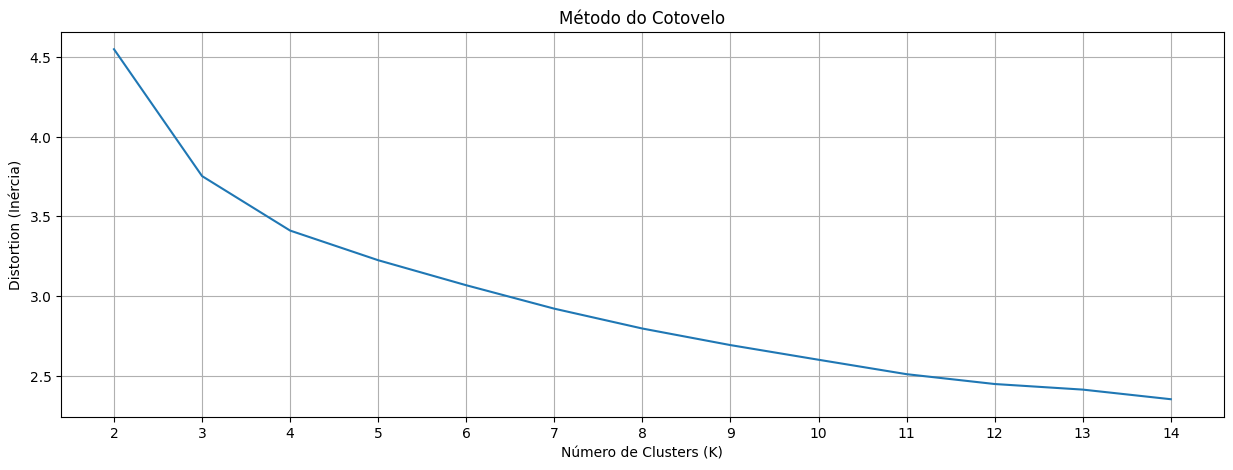

In [35]:
plt.figure(figsize=(15,5))
plt.plot(n_clusters, distortions)
plt.grid()

plt.xticks(n_clusters)

# Adicione rótulos aos eixos para clareza
plt.xlabel("Número de Clusters (K)")
plt.ylabel("Distortion (Inércia)")
plt.title("Método do Cotovelo")


plt.show() # Mostra o gráfico

In [36]:
# K = 3
X_t = KMeans(n_clusters=3, max_iter=10_000, n_init=100, random_state=61658).fit_predict(X)
X_t

array([2, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 2, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 2, 1, 1, 0, 1, 0, 1, 1, 1, 1, 2, 1,
       1, 1, 2, 2, 2, 1, 0, 1, 0, 1, 2, 1, 0, 2, 0, 0, 0, 2, 0, 0, 2, 1,
       0, 1, 1, 2, 1, 0, 1, 2, 2, 0, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 2, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 2, 0,
       2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 2, 1, 0, 1, 1, 2, 1, 1, 2, 0, 1, 1, 2, 0, 1, 0, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 2, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 2, 1, 1, 0, 1, 0, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2,
       2, 1, 0, 1, 0, 1, 2, 1, 0, 2, 0, 0, 0, 2, 0,

In [37]:
# Adicionando uma coluna Cluster no dataset
X['Cluster'] = X_t
X

,BMI,Sleep,SoundSleep,Pregancies,Age_40-49,Age_50-59,Age_60 or older,Age_less than 40,Gender_Female,Gender_Male,...,BPLevel_low,BPLevel_normal,Pdiabetes_0,Pdiabetes_no,Pdiabetes_yes,UriationFreq_not much,UriationFreq_quite often,Diabetic_no,Diabetic_yes,Cluster
0,0.58209,0.119403,0.089552,0.0,0.0,0.014925,0.0,0.0,0.0,0.014925,...,0.0,0.0,0.014925,0.0,0.0,0.014925,0.0,0.014925,0.0,2
1,0.5,0.142857,0.107143,0.0,0.0,0.017857,0.0,0.0,0.0,0.017857,...,0.0,0.017857,0.017857,0.0,0.0,0.017857,0.0,0.017857,0.0,1
2,0.48,0.12,0.12,0.0,0.02,0.0,0.0,0.0,0.0,0.02,...,0.0,0.02,0.02,0.0,0.0,0.02,0.0,0.02,0.0,1
3,0.45098,0.156863,0.117647,0.0,0.0,0.019608,0.0,0.0,0.0,0.019608,...,0.0,0.019608,0.019608,0.0,0.0,0.019608,0.0,0.019608,0.0,1
4,0.473684,0.140351,0.140351,0.0,0.017544,0.0,0.0,0.0,0.0,0.017544,...,0.0,0.017544,0.017544,0.0,0.0,0.017544,0.0,0.017544,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947,0.471698,0.150943,0.113208,0.0,0.0,0.0,0.0,0.018868,0.0,0.018868,...,0.0,0.018868,0.018868,0.0,0.0,0.018868,0.0,0.0,0.018868,1
948,0.519231,0.115385,0.096154,0.0,0.0,0.0,0.019231,0.0,0.0,0.019231,...,0.0,0.0,0.019231,0.0,0.0,0.0,0.019231,0.0,0.019231,1
949,0.479167,0.125,0.104167,0.0,0.0,0.0,0.020833,0.0,0.0,0.020833,...,0.0,0.0,0.020833,0.0,0.0,0.020833,0.0,0.020833,0.0,1
950,0.519231,0.115385,0.096154,0.0,0.0,0.0,0.019231,0.0,0.0,0.019231,...,0.0,0.0,0.019231,0.0,0.0,0.019231,0.0,0.019231,0.0,1
